In [39]:
# Import libraries
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import nibabel as nib
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import SimpleITK as sitk
import six
from radiomics import featureextractor 
import numpy as np
import os
import pickle
import pandas as pd
import logging
from scipy.stats import linregress
import pandas
from collections import Counter
from multiprocessing import Pool
from notebook import notebookapp
from numpy import matlib
import random
from scipy import ndimage
from util import pyvis
from util import extract
from loader import data_loader
from IPython.display import HTML
import util
import warnings

In [2]:
HTML('''
<style>
.jupyter-matplotlib {
    background-color: #000;
}

.widget-label, .jupyter-matplotlib-header{
    color: #fff;
}

.jupyter-button {
    background-color: #333;
    color: #fff;
}
</style>
''')

In [3]:
# Get case IDs
case_list = open('/home/ali/RadDBS-QSM/data/docs/cases_90','r')
lines = case_list.read()
lists = np.loadtxt(case_list.name,comments="#", delimiter=",",unpack=False,dtype=str)
case_id = []
for lines in lists:     
    case_id.append(lines[-9:-7])

# Load scores
file_dir = '/home/ali/RadDBS-QSM/data/docs/QSM anonymus- 6.22.2023-1528.csv'
motor_df = util.filter_scores(file_dir,'pre-dbs updrs','stim','CORNELL ID')
# Find cases with all required scores
subs,pre_imp,post_imp,pre_updrs_off = util.get_full_cases(motor_df,
                                                          'CORNELL ID',
                                                          'OFF (pre-dbs updrs)',
                                                          'ON (pre-dbs updrs)',
                                                          'OFF meds ON stim 6mo')
# Load extracted features
npy_dir = '/home/ali/RadDBS-QSM/data/npy/'
phi_dir = '/home/ali/RadDBS-QSM/data/phi/'
roi_path = '/data/Ali/atlas/mcgill_pd_atlas/PD25-subcortical-labels.csv'
n_rois = 6
Phi_all, X_all, R_all, K_all, ID_all = util.load_featstruct(phi_dir,npy_dir+'X/',npy_dir+'R/',npy_dir+'K/',n_rois,1595)
ids = np.asarray(ID_all).astype(int)
# Find overlap between scored subjects and feature extraction cases
c_cases = np.intersect1d(np.asarray(case_id).astype(int),np.asarray(subs).astype(int))
# Complete case indices with respect to feature matrix
c_cases_idx = np.in1d(ids,c_cases)
X_all_c = X_all[c_cases_idx,:,:]
K_all_c = K_all[c_cases_idx,:,:]
R_all_c = R_all[c_cases_idx,:,:]
# Re-index the scored subjects with respect to complete cases
s_cases_idx = np.in1d(subs,ids[c_cases_idx])
pre_imp = pre_imp[s_cases_idx]
post_imp = post_imp[s_cases_idx]
pre_updrs_off = pre_updrs_off[s_cases_idx]
per_change = post_imp

The Unified Parkinson's Disease Rating Scale (UPDRS) is divided into 4 parts. Part 3, UPDRS-III is motor symptoms and ranges from $[0-132]^1$. From real data, construct a set of simulated data spanning this range. The most correlated radiomic feature will be used to simulate a range of inputs.

In [4]:
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
#
X_t,oscaler = util.make_feature_matrix(X_all_c,pre_updrs_off)
y = per_change



In [5]:
R_all_c.reshape(R_all_c.shape[0],R_all_c.shape[1]*R_all_c.shape[2])[1,1]

'Left red nucleus'

Feature 1081 wavelet-LHH_gldm_DependenceNonUn in ROI Left red nucleus has correlation 0.45291946225817253


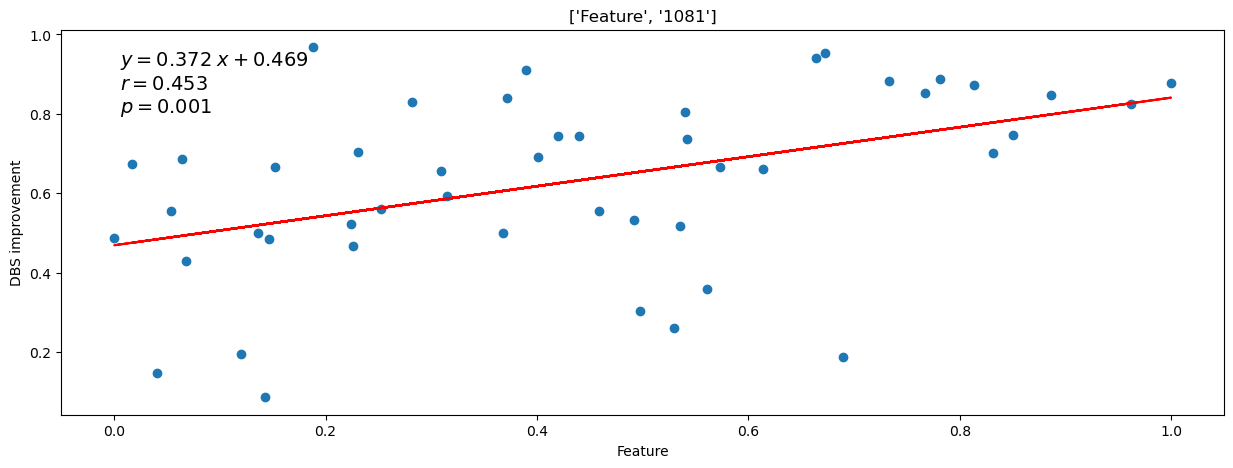

Feature 3767 logarithm_firstorder_Kurtosis in ROI Left substantia nigra has correlation 0.4154762672402314


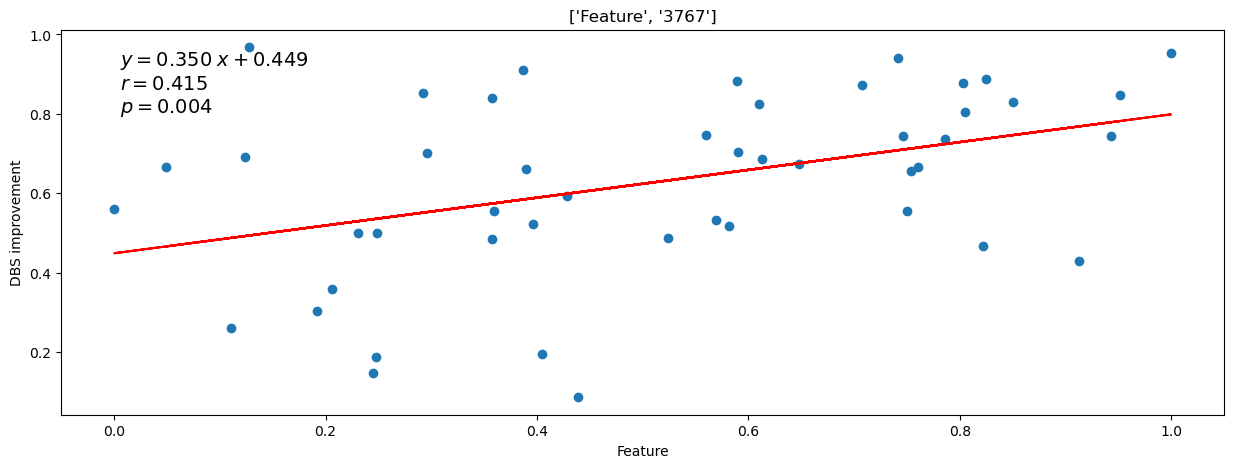

Feature 3788 logarithm_glcm_DifferenceVarianc in ROI Left substantia nigra has correlation 0.4063276515939667


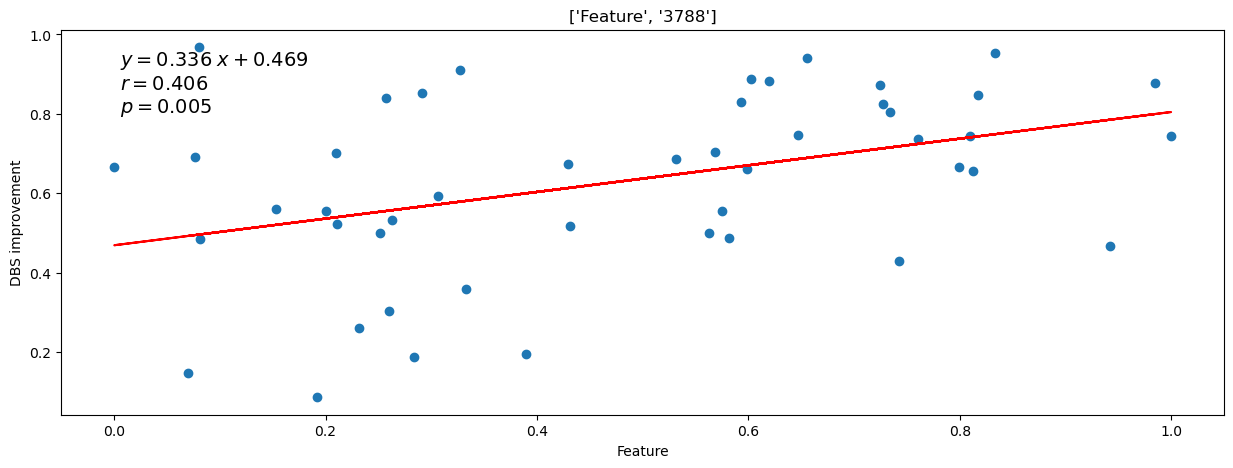

Feature 3789 logarithm_glcm_Id in ROI Left substantia nigra has correlation 0.409392465682226


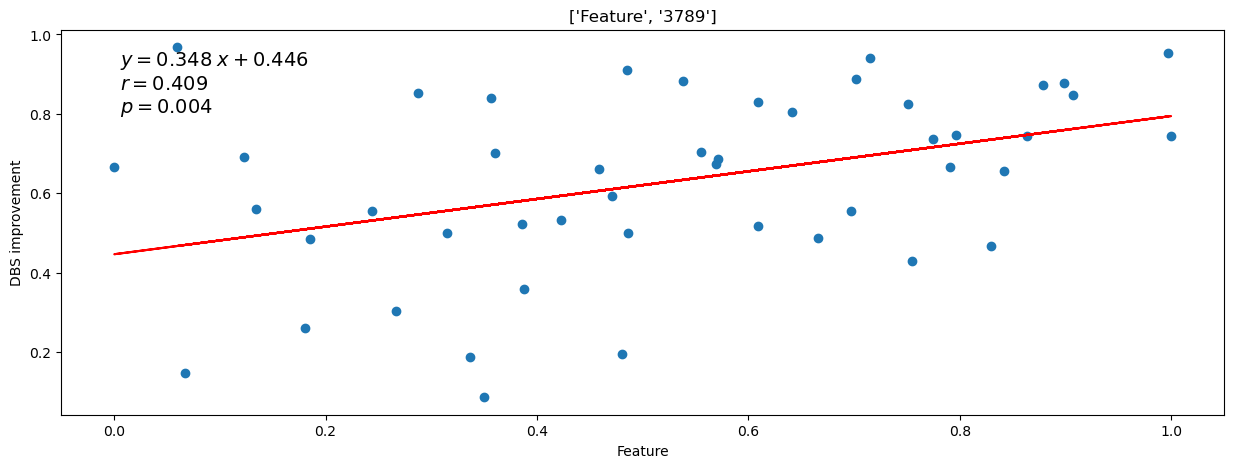

Feature 3800 logarithm_glcm_MaximumProbabilit in ROI Left substantia nigra has correlation 0.42282536669801135


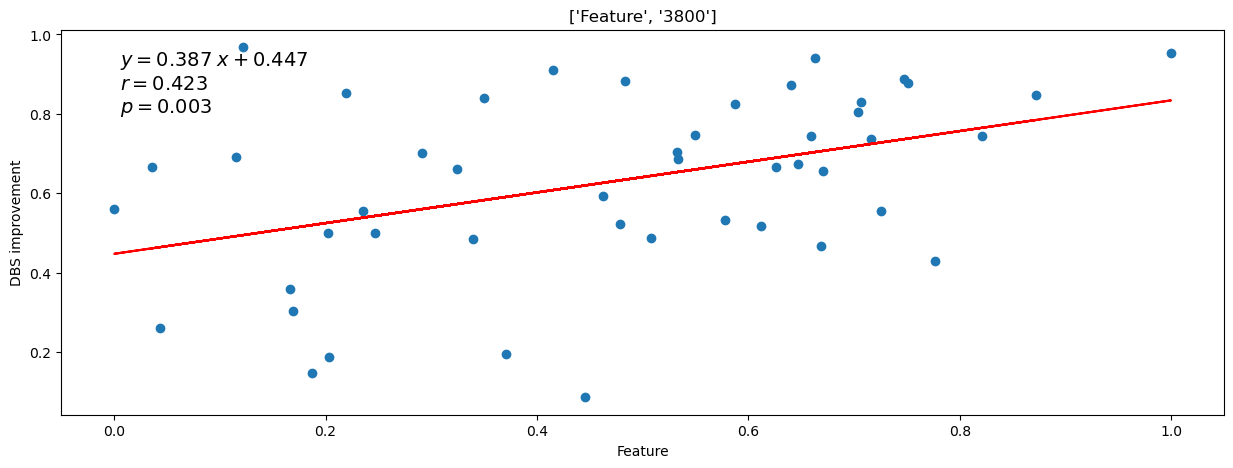

Feature 3804 logarithm_gldm_DependenceEntropy in ROI Left substantia nigra has correlation 0.4275480764500579


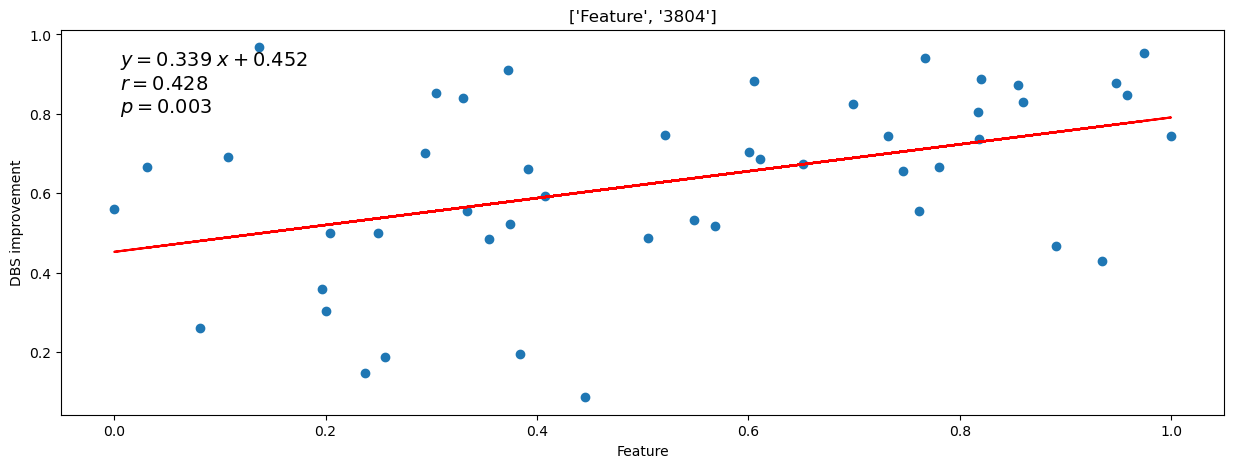

Feature 3817 logarithm_gldm_SmallDependenceLo in ROI Left substantia nigra has correlation 0.4032675223013618


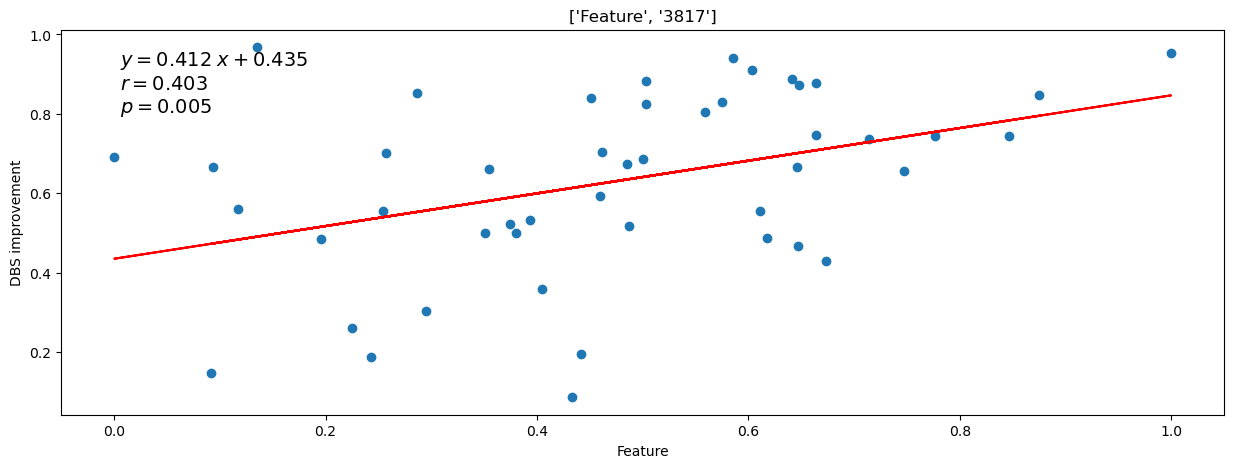

Feature 3850 logarithm_ngtdm_Busyness in ROI Left substantia nigra has correlation 0.40528803824931


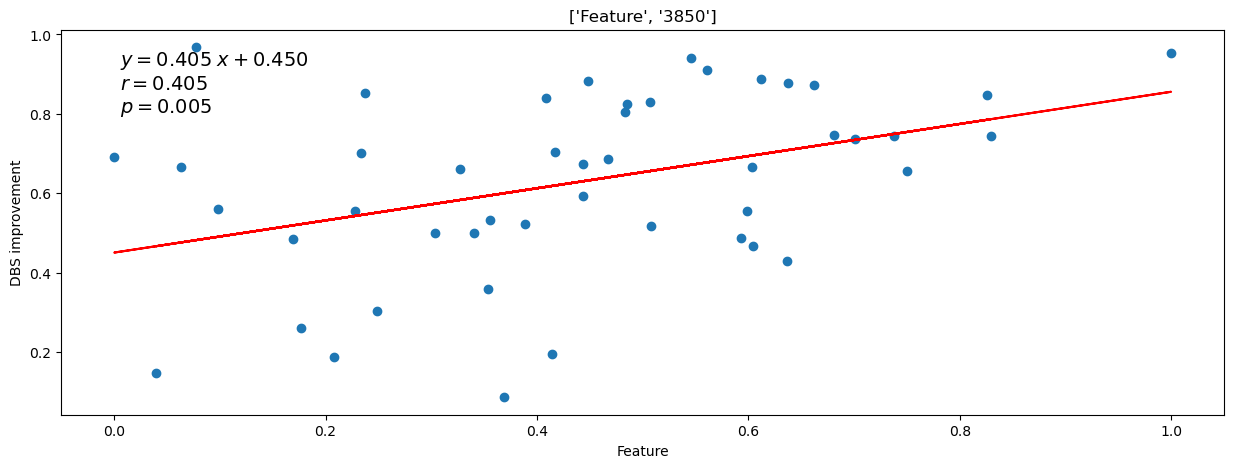

Feature 3957 squareroot_firstorder_Median in ROI Left substantia nigra has correlation 0.4151934935581637


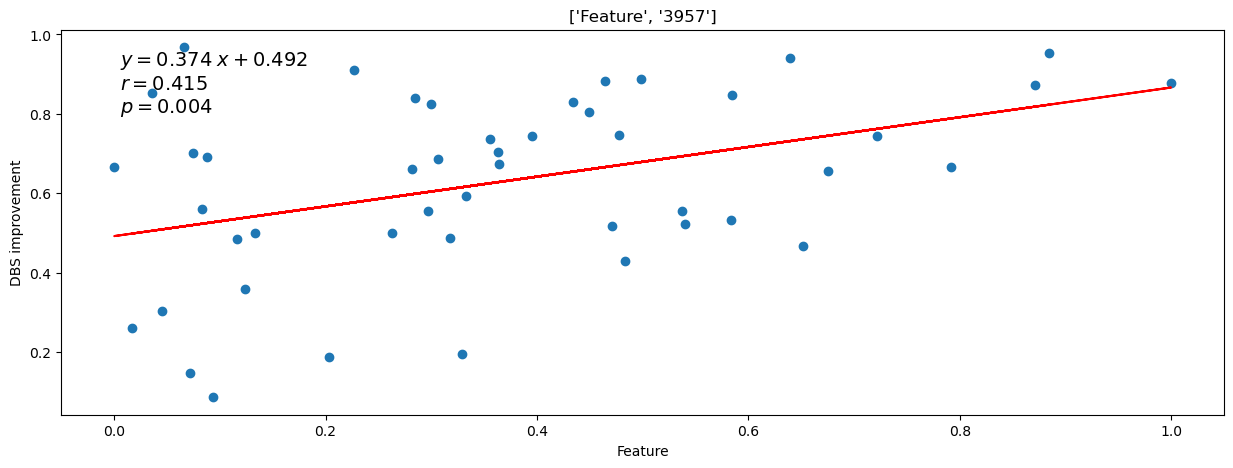

Feature 3967 squareroot_glcm_ClusterProminenc in ROI Left substantia nigra has correlation 0.41958422175246757


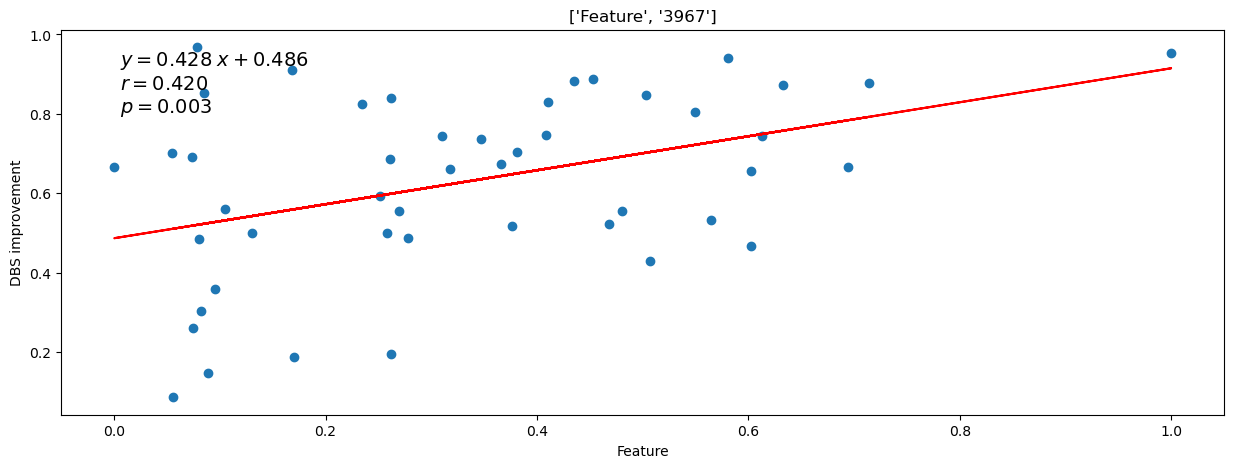

Feature 3971 squareroot_glcm_Correlation in ROI Left substantia nigra has correlation 0.42186580554506253


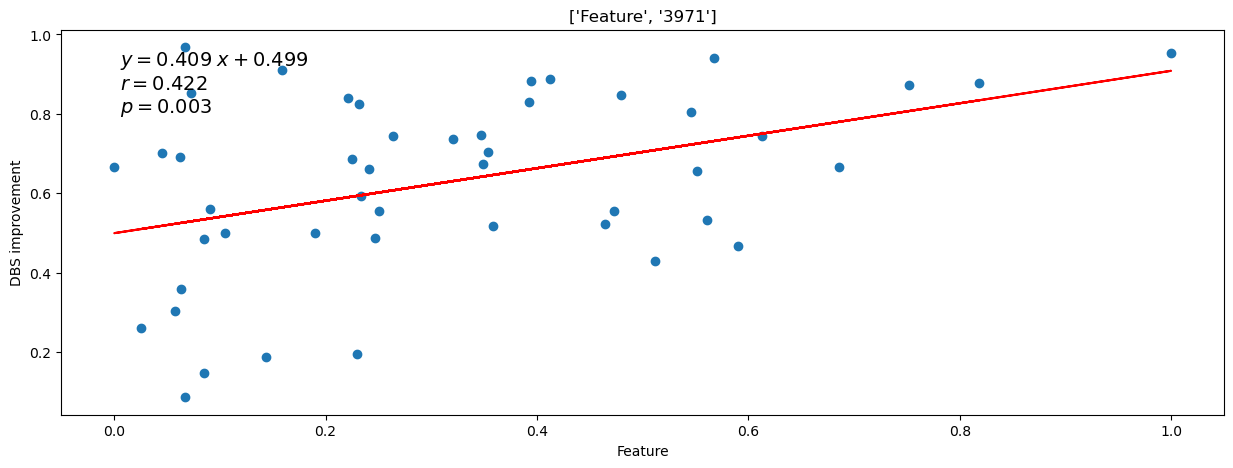

Feature 3991 squareroot_gldm_DependenceNonUni in ROI Left substantia nigra has correlation 0.4234973129339539


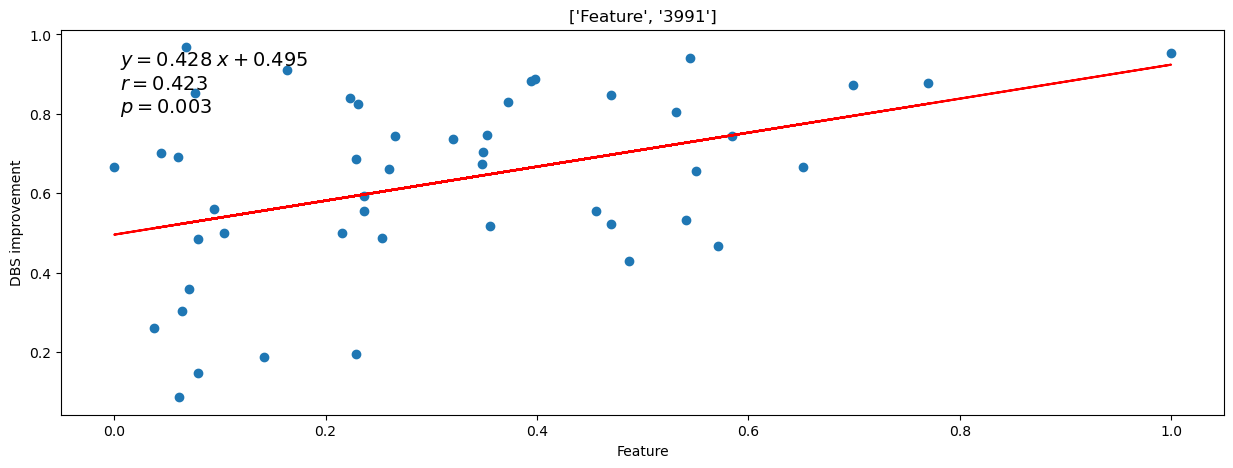

Feature 3997 squareroot_gldm_LargeDependenceE in ROI Left substantia nigra has correlation 0.41927346263192455


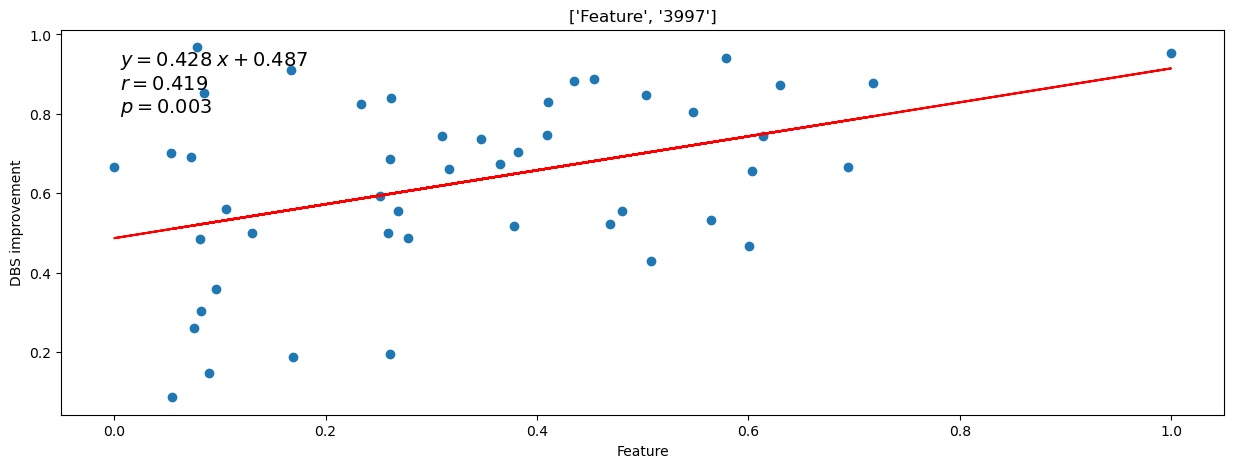

Feature 4008 squareroot_glrlm_LongRunEmphasis in ROI Left substantia nigra has correlation 0.4014150331316969


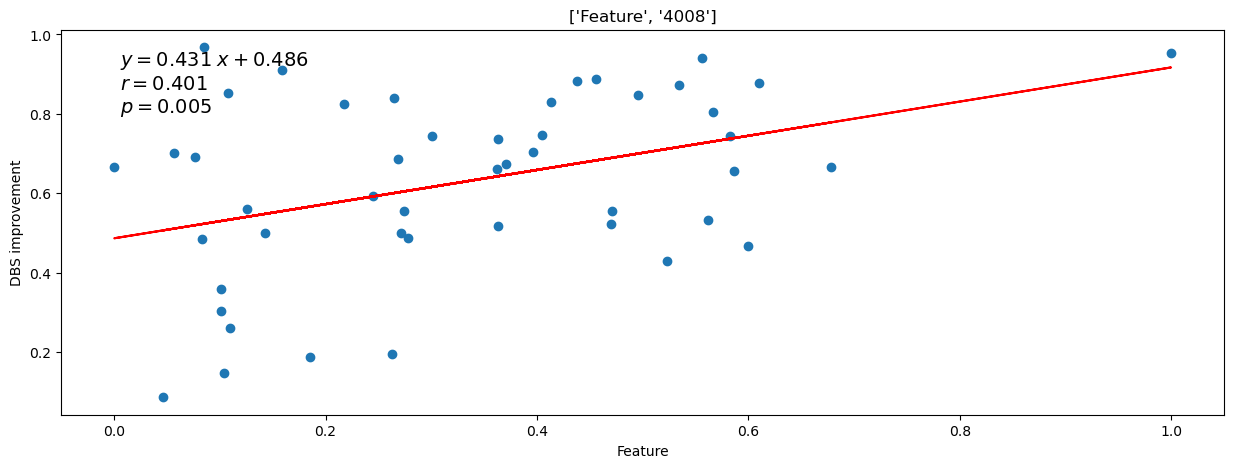

Feature 5383 logarithm_glcm_DifferenceVarianc in ROI Right Substantia nigra has correlation 0.4102579563752281


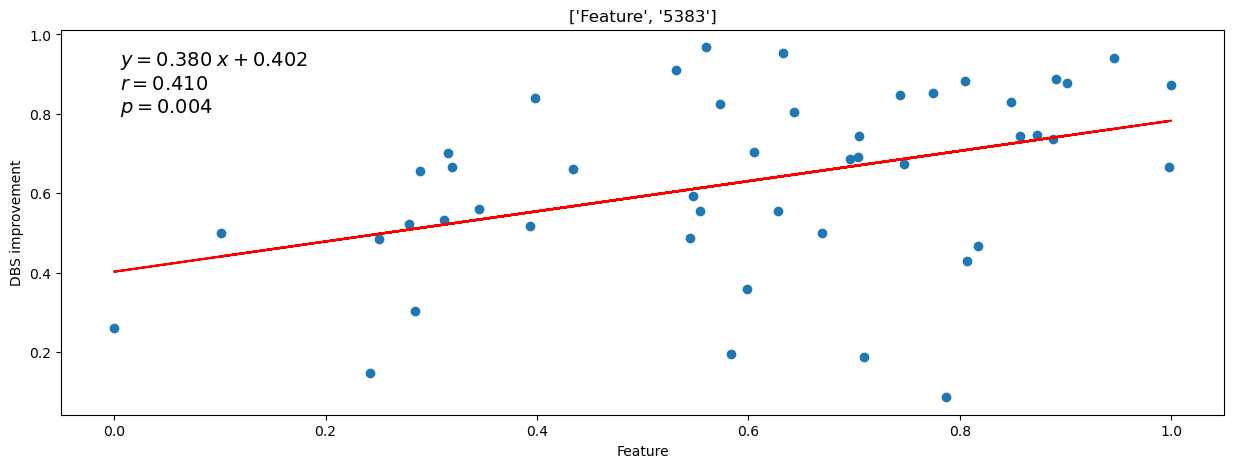

Feature 5413 logarithm_glrlm_GrayLevelNonUnif in ROI Right Substantia nigra has correlation 0.4075166098124693


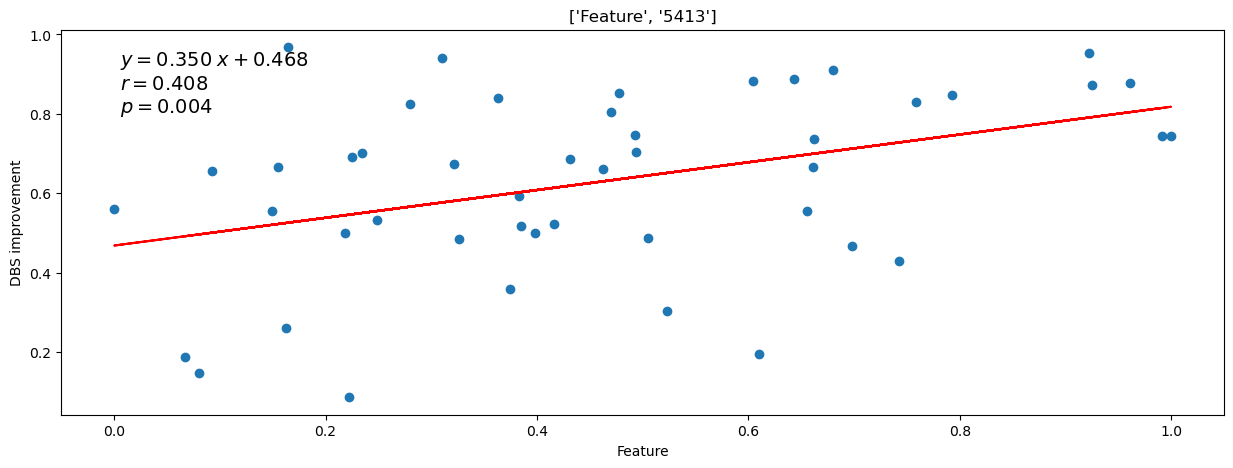

Feature 5567 squareroot_glcm_DifferenceAverag in ROI Right Substantia nigra has correlation 0.4018446550786992


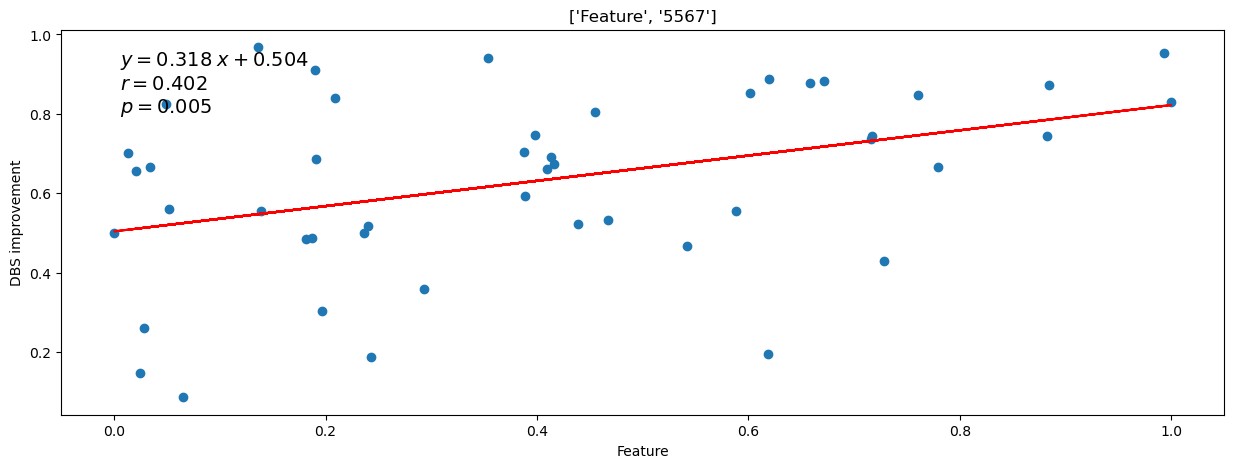

Feature 6684 lbp-3D-m1_firstorder_Range in ROI Left subthalamic nucleus has correlation 0.4542694159377955


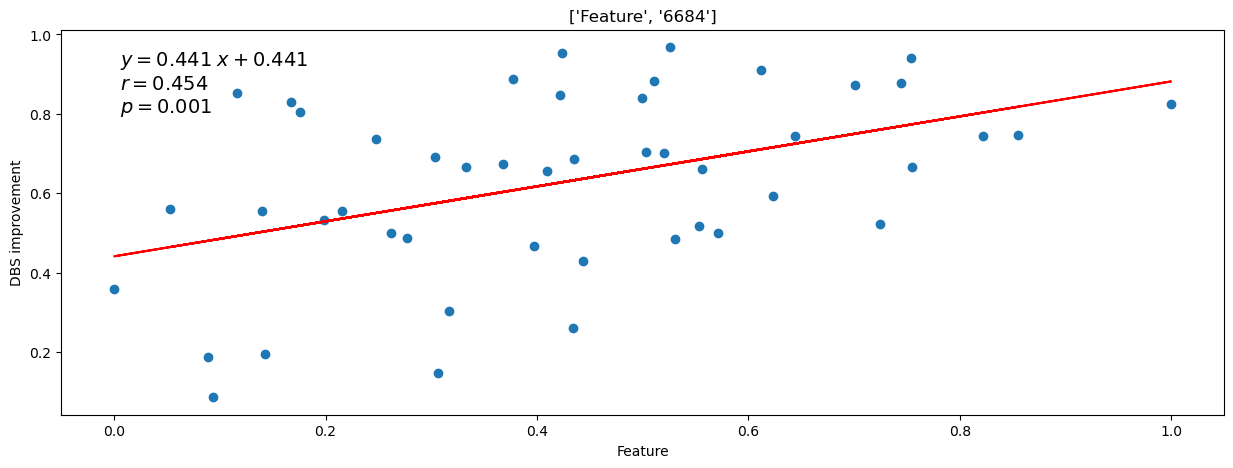

Feature 6689 lbp-3D-m1_firstorder_Uniformity in ROI Left subthalamic nucleus has correlation 0.4312363811460602


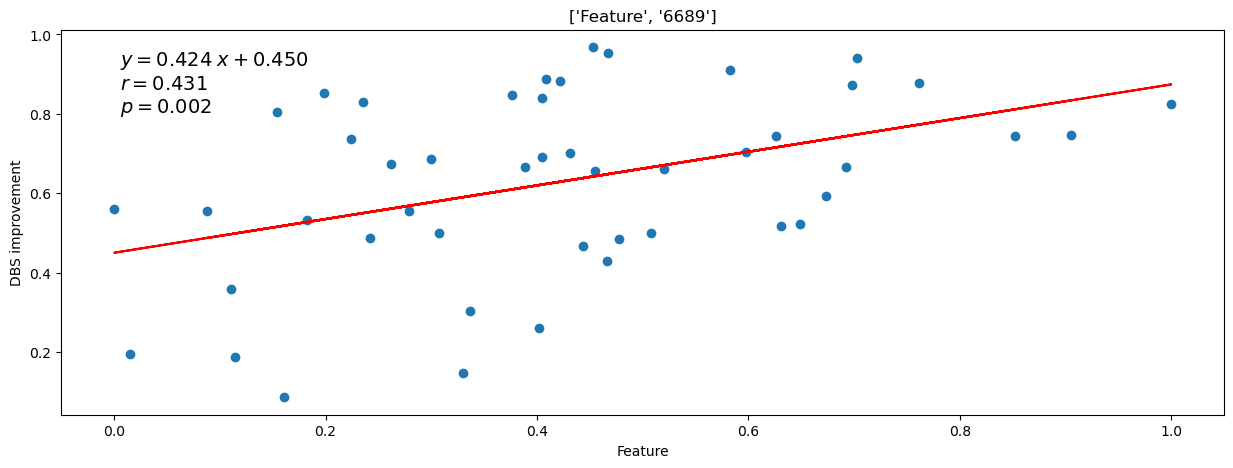

Feature 6694 lbp-3D-m1_glcm_ClusterTendency in ROI Left subthalamic nucleus has correlation 0.4446773270531458


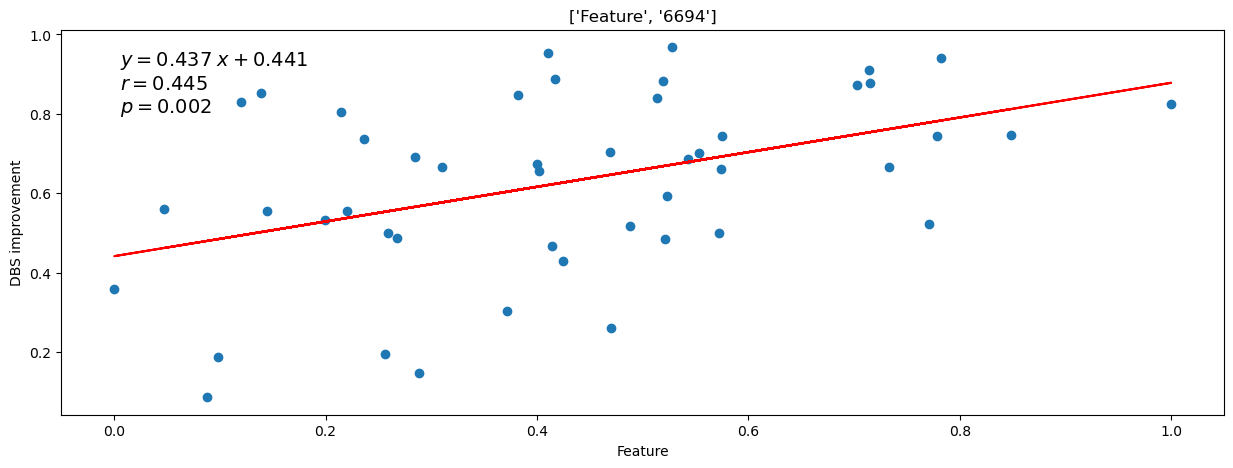

Feature 8280 lbp-3D-m1_firstorder_RobustMeanA in ROI Right subthalamic nucleus has correlation 0.4135350549641929


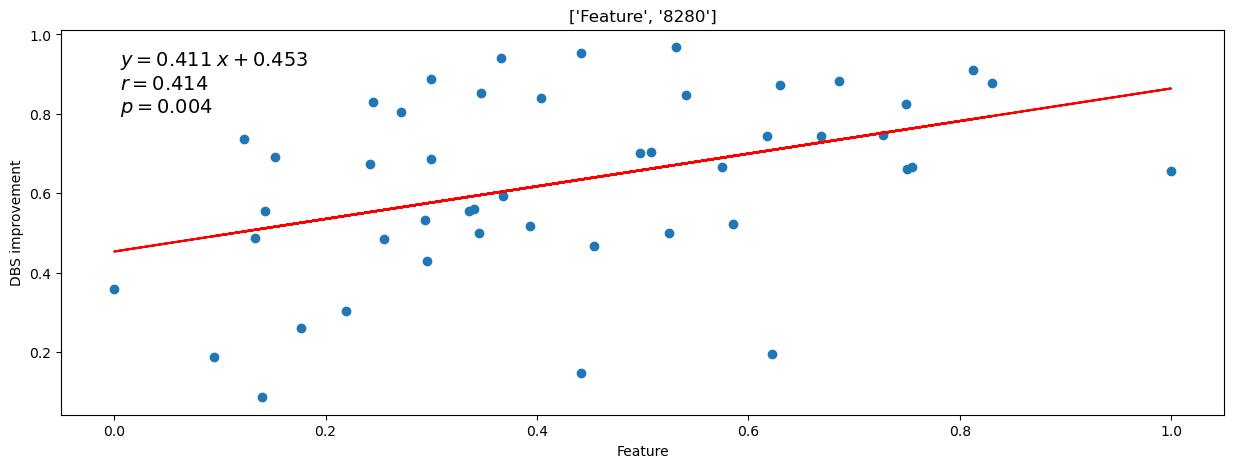

Feature 8284 lbp-3D-m1_firstorder_Uniformity in ROI Right subthalamic nucleus has correlation 0.4425947869251599


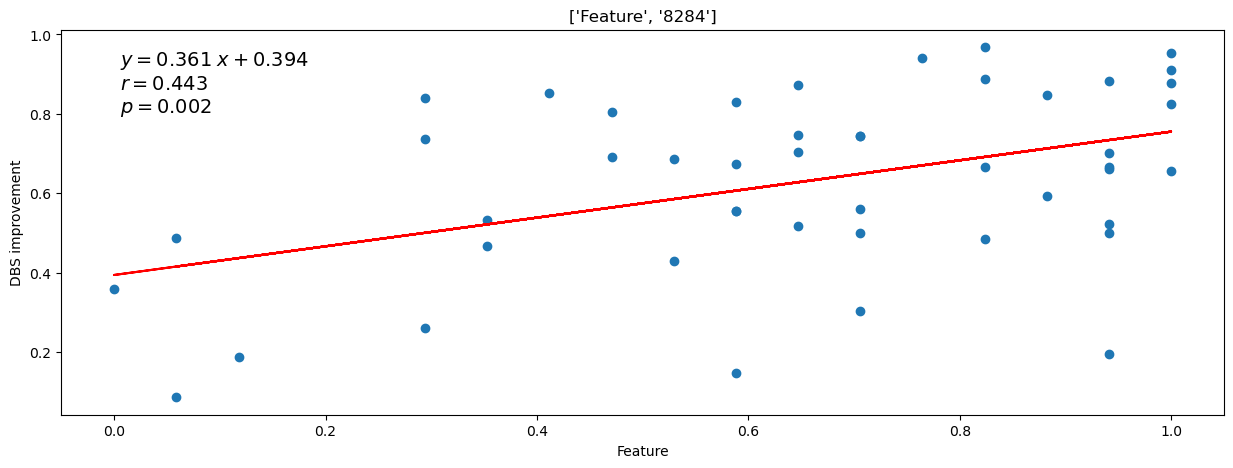

Feature 8607 logarithm_glrlm_LongRunEmphasis in ROI Right subthalamic nucleus has correlation 0.4574811527462221


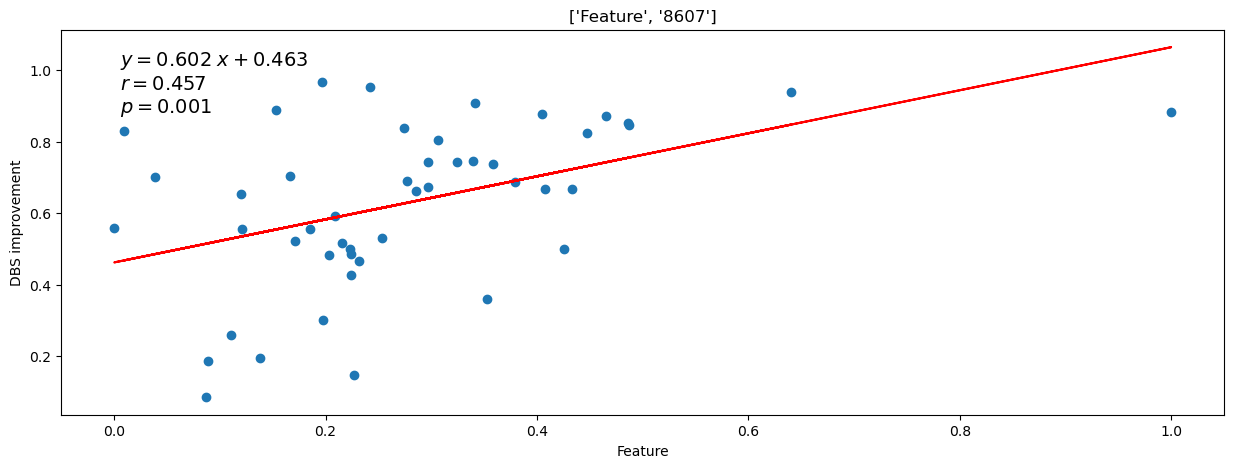

In [100]:
Js = []
for j in np.arange(X_t.shape[1]):
    lr_prepost = linregress(X_t[:,j],per_change)
    
    if lr_prepost.rvalue>0.4:
        Js.append(j)
        print('Feature',str(j),K_all_c.reshape(K_all_c.shape[0],K_all_c.shape[1]*K_all_c.shape[2])[1,j],
              'in ROI',R_all_c.reshape(R_all_c.shape[0],R_all_c.shape[1]*R_all_c.shape[2])[1,j],'has correlation',str(lr_prepost.rvalue))
        plt.rcParams["figure.figsize"] = (15,5)
        # Cross validation results
        [fig,ax] = plt.subplots(sharex=True, sharey=True)
        plt.scatter(X_t[:,j],per_change,)
        plt.plot(X_t[:,j],X_t[:,j]*lr_prepost.slope+lr_prepost.intercept,'-r')
        plt.title(['Feature',str(j)])
        plt.ylabel("DBS improvement")
        plt.xlabel("Feature")
        text = f"$y={lr_prepost.slope:0.3f}\;x{lr_prepost.intercept:+0.3f}$\n$r = {lr_prepost.rvalue:0.3f}$\n$p = {lr_prepost.pvalue:0.3f}$"
        plt.text(0.05, 0.95, text,transform=ax.transAxes,
        fontsize=14, verticalalignment='top')
        plt.show()

Xc = X_t[:,Js]

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 47 samples in 0.001s...
[t-SNE] Computed neighbors for 47 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 47 / 47
[t-SNE] Mean sigma: 13.048675
[t-SNE] KL divergence after 250 iterations with early exaggeration: 112.310524
[t-SNE] KL divergence after 1000 iterations: 0.844199


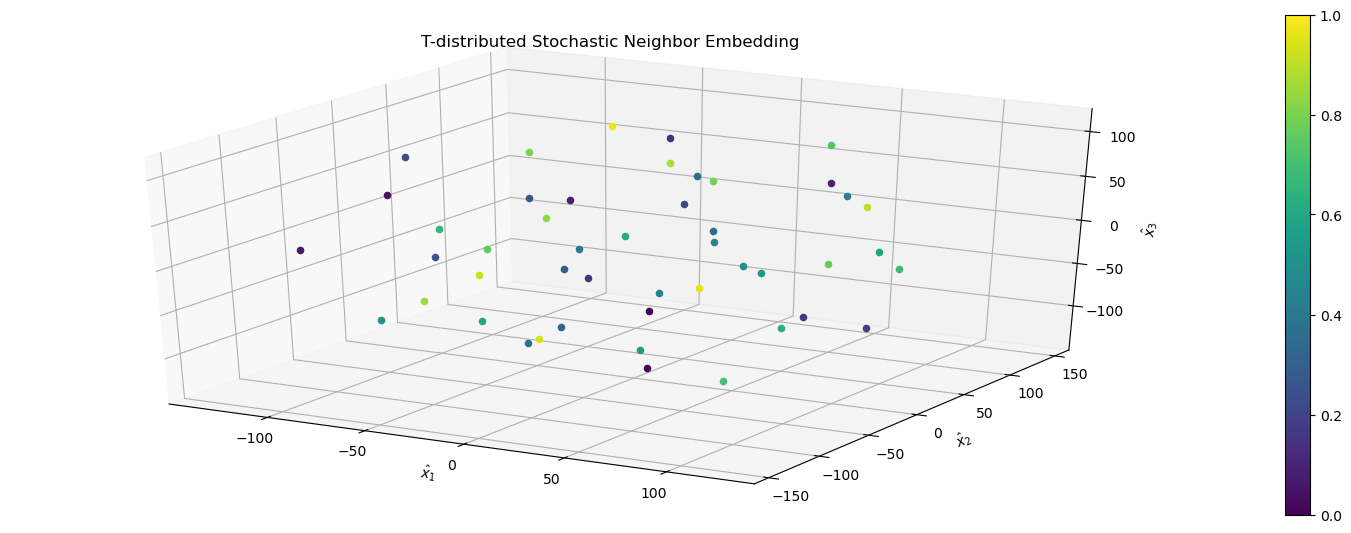

In [103]:
%matplotlib inline
fig = plt.figure()
ax = Axes3D(fig)
# Specify 3D embedding
tsne = TSNE(3, verbose=1, perplexity=30, random_state=1, learning_rate='auto', init='random', )
# Fit the high dimensional feature vector
tsne_proj = tsne.fit_transform(X_t)
# Plot f(x,y,z) = DBS outcome
num_categories = len(per_change)
cmap = cm.get_cmap('viridis')
for lab in np.arange(num_categories):
    indices = per_change == lab
    rgba = cmap(lab/num_categories)
    p = ax.scatter(tsne_proj[lab, 0],
               tsne_proj[lab, 1],
               tsne_proj[lab, 2],
               label=per_change[lab],
               alpha=1,color=rgba)
fig.colorbar(p)
ax.set_title('T-distributed Stochastic Neighbor Embedding')
ax.set_xlabel(r'$\hat{x}_1$')
ax.set_ylabel(r'$\hat{x}_2$')
ax.set_zlabel(r'$\hat{x}_3$')
plt.show()

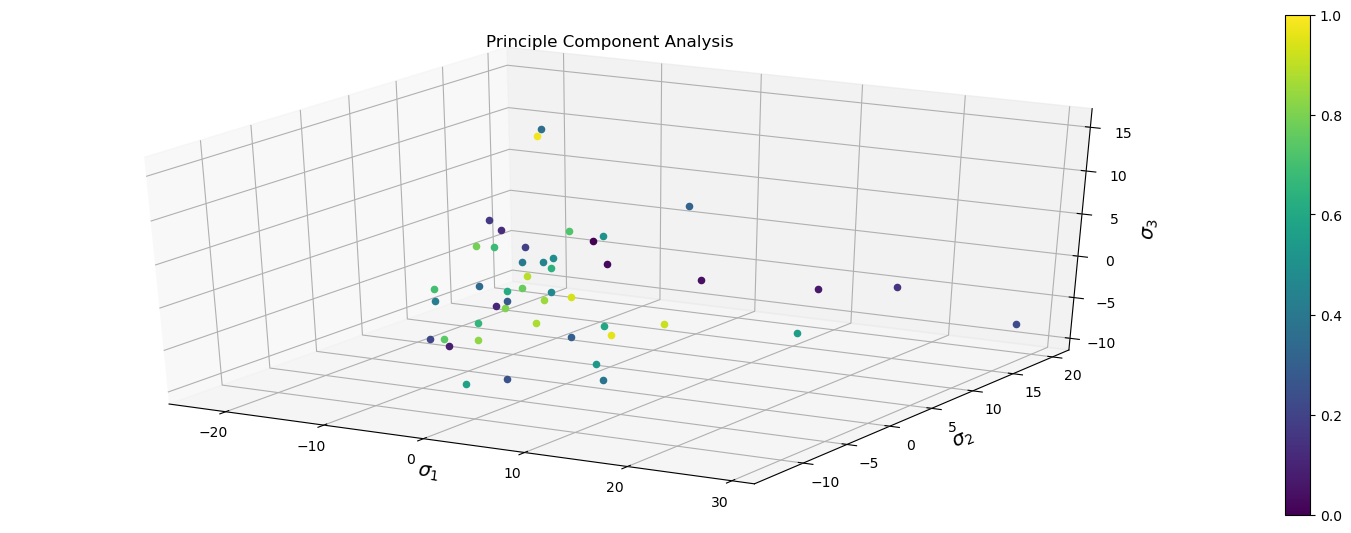

In [104]:
pca = PCA(n_components=3)
pca.fit(X_t) 
X_pca = pca.transform(X_t) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio



cdict = {0:'red',1:'green'}
labl = {0:'Malignant',1:'Benign'}
marker = {0:'*',1:'o'}
alpha = {0:.3, 1:.5}

fig = plt.figure()
ax = Axes3D(fig)
y = per_change
cmap = cm.get_cmap('viridis')
for lab in np.arange(num_categories):
    indices = per_change == lab
    rgba = cmap(lab/num_categories)
    p = ax.scatter(X_pca[lab, 0],
               X_pca[lab, 1],
               X_pca[lab, 2],
               label=per_change[lab],
               alpha=1,color=rgba)

ax.set_xlabel(r'$\sigma_1$', fontsize=14)
ax.set_ylabel(r'$\sigma_2$', fontsize=14)
ax.set_zlabel(r'$\sigma_3$', fontsize=14)
ax.set_title('Principle Component Analysis')
fig.colorbar(p)

plt.show()

[1] R. Balestrino, “Applications of the European Parkinson’s Disease Association sponsored Parkinson’s Disease Composite Scale (PDCS)”, npj Parkinson's Disease, vol. 5, no. 1, 2019, doi: 10.1038/s41531-019-0097-1.